In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition

In [2]:
# mapping_file['Origin'] = mapping_file['genotype_1'].astype(str)
# mapping_file['Origin'] = mapping_file['Origin'].replace({'12':'African','9':'Asian','5':'African','3':'African','1':'African','11':'African',
#                                             '8':'African','6':'Asian','4':'Asian','2':'Asian','10':'African','7':'Asian'})
# mapping_file.to_csv('../QIIME2.2/mapping_file/mapping_file.csv', index = True)

In [3]:
mapping_file = pd.read_csv('../QIIME2.2/mapping_file/mapping_file.csv', index_col=0)
print(mapping_file.shape)
mapping_file.head()

(143, 42)


,genotype_1,fertility_1,amf,rep_1,group_1,shoot_mass,root_mass,total_mass,ratio_root_to_shoot,root_colonization,...,G_5,FERT_5,AMF,REP_5,group_5,Length,AvgDiam,Forks,SurfArea,Origin
#SampleID,,,,,,,,,,,,,,,,,,,,,
L1,1,P,Y,1,Common (C. dactylon),29.961,4.46,34.421,0.129572,43,...,1,P,Y,1,Common (C. dactylon),162.8464,0.2905,904.0,14.8643,African
L10,1,PPP,Y,2,Common (C. dactylon),26.283,10.16,36.443,0.278792,36,...,1,PPP,Y,2,Common (C. dactylon),329.7942,0.2978,2620.0,30.8595,African
L100,9,PP,Y,5,Common (C. dactylon),18.142,6.82,24.962,0.273215,21,...,9,PP,Y,5,Common (C. dactylon),229.4975,0.3495,1577.0,25.1969,Asian
L101,9,PP,Y,1,Common (C. dactylon),25.649,10.88,36.529,0.297846,26,...,9,PP,Y,1,Common (C. dactylon),216.1839,0.3708,1395.0,25.1835,Asian
L102,9,PP,Y,2,Common (C. dactylon),25.664,12.66,38.324,0.330341,39,...,9,PP,Y,2,Common (C. dactylon),302.0509,0.2743,1827.0,26.0297,Asian


In [4]:
mapping_file.columns

Index(['genotype_1', 'fertility_1', 'amf', 'rep_1', 'group_1', 'shoot_mass',
       'root_mass', 'total_mass', 'ratio_root_to_shoot', 'root_colonization',
       'genotype_2`', 'fertility_2', 'rep_2', 'total_biomass_esponse',
       'root_biomass_response', 'shoot_biomass_response', 'genotype_4',
       'fertility_4', 'inoculum', 'rep_4', 'TN', 'P', 'Ca', 'K', 'Mg', 'Na',
       'S', 'B', 'Fe', 'Zn', 'Cu', 'Mn', 'G_5', 'FERT_5', 'AMF', 'REP_5',
       'group_5', 'Length', 'AvgDiam', 'Forks', 'SurfArea', 'Origin'],
      dtype='object')

In [5]:
# columns = ['total_mass','root_colonization', 'root_biomass_response', 'P', 'Length','genotype_1']
columns = ['shoot_biomass_response','shoot_mass','total_mass','SurfArea','K','Length','Forks','root_mass', 'genotype_1']
pca_df = mapping_file[columns]
pca_df = pca_df[~pca_df.isnull().any(axis=1)]
pca_df.set_index('genotype_1', inplace = True)
pca_df.sort_index(inplace = True)

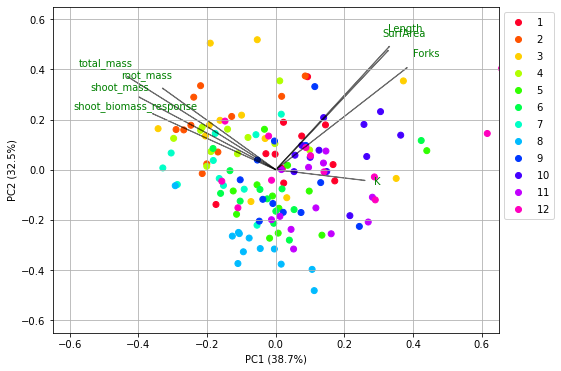

In [6]:
# include variation explained on each axis
# include only statistitically significant env vars?
# Scaling mean = 0, var = 1
plt.figure(figsize=(8, 6))
y = pca_df.index
scaler = StandardScaler()
scaler.fit(pca_df.values)
X=scaler.transform(pca_df.values)
pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    scatter = plt.scatter(xs * scalex,ys * scaley, c = y, cmap = 'gist_rainbow')
    plt.legend(*scatter.legend_elements(), bbox_to_anchor=(1, 1))
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'black',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-0.65,0.65)
    plt.ylim(-0.65,0.65)
    plt.xlabel("PC{}".format(1) + ' (' + str(round(pca.explained_variance_ratio_[0]*100, 1)) + '%)')
    plt.ylabel("PC{}".format(2) + ' (' + str(round(pca.explained_variance_ratio_[1]*100, 1)) + '%)')
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]), columns)
plt.savefig('../Figures/pca_biplot_simple.jpg', bbox_inches = 'tight', dpi = 300)

# Random forest

In [7]:
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from collections import Counter
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import time

In [8]:
mapping_file.columns

Index(['genotype_1', 'fertility_1', 'amf', 'rep_1', 'group_1', 'shoot_mass',
       'root_mass', 'total_mass', 'ratio_root_to_shoot', 'root_colonization',
       'genotype_2`', 'fertility_2', 'rep_2', 'total_biomass_esponse',
       'root_biomass_response', 'shoot_biomass_response', 'genotype_4',
       'fertility_4', 'inoculum', 'rep_4', 'TN', 'P', 'Ca', 'K', 'Mg', 'Na',
       'S', 'B', 'Fe', 'Zn', 'Cu', 'Mn', 'G_5', 'FERT_5', 'AMF', 'REP_5',
       'group_5', 'Length', 'AvgDiam', 'Forks', 'SurfArea', 'Origin'],
      dtype='object')

In [9]:
mapping_file_no_nan = mapping_file.drop('Na', axis = 1)
print(mapping_file_no_nan.shape)
mapping_file_no_nan = mapping_file_no_nan.dropna(axis=0)
print(mapping_file_no_nan.shape)
data_numeric = mapping_file_no_nan.select_dtypes(include=['float64'])
data_categories = pd.DataFrame(mapping_file_no_nan['Origin'])
data_numeric.head()

(143, 41)
(138, 41)


,shoot_mass,root_mass,total_mass,ratio_root_to_shoot,total_biomass_esponse,root_biomass_response,shoot_biomass_response,TN,P,Ca,...,Mg,S,Fe,Zn,Cu,Mn,Length,AvgDiam,Forks,SurfArea
#SampleID,,,,,,,,,,,,,,,,,,,,,
L1,29.961,4.46,34.421,0.129572,-11.315767,-200.224215,16.805180,1.3317,0.046,0.605,...,0.225,0.222,205.131,40.296,24.655,134.694,162.8464,0.2905,904.0,14.8643
L10,26.283,10.16,36.443,0.278792,-65.902725,-183.759842,16.893049,1.5200,0.130,0.510,...,0.210,0.340,291.100,29.000,15.800,66.900,329.7942,0.2978,2620.0,30.8595
L100,18.142,6.82,24.962,0.273215,13.654464,-52.492669,10.472936,1.3600,0.076,0.905,...,0.223,0.360,48.811,38.705,9.024,55.564,229.4975,0.3495,1577.0,25.1969
L101,25.649,10.88,36.529,0.297846,12.647189,-131.617647,19.111856,1.2500,0.090,0.580,...,0.160,0.270,290.800,26.900,16.600,70.900,216.1839,0.3708,1395.0,25.1835
L102,25.664,12.66,38.324,0.330341,8.203753,-4.107425,38.922226,1.3300,0.110,0.730,...,0.190,0.370,265.700,29.200,20.700,83.900,302.0509,0.2743,1827.0,26.0297


In [11]:
# start = time.time()
# accuracy_list = []
# random_chance_list = []
# for i in range(50):
#     X_train, X_test, Y_train, Y_test = train_test_split(data_numeric.values,
#                                                         data_categories['Origin'].values, test_size=0.3, random_state=i)
#     param_grid = {
#         'n_estimators': [200, 500],
#         'max_features': ['auto', 'sqrt', 'log2'],
#         'max_depth' : [2,3,4,5,6,7,8,9,10],
#         'criterion' :['gini', 'entropy']
#     }
#     rfc=RandomForestClassifier(random_state=42)
#     CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
#     CV_rfc.fit(X_train, Y_train)
#     predicted = CV_rfc.predict(X_test)
# end = time.time()
# print(end - start)

In [12]:
# print(CV_rfc.best_params_) #for origin
# Output: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}

In [13]:
# print(CV_rfc.best_params_) for genotype
# Output: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}

In [14]:
start = time.time()
accuracy_list = []
random_chance_list = []
predicted_category = 'Origin'
for i in range(50):
    X_train, X_test, Y_train, Y_test = train_test_split(data_numeric.values,
                                                        data_categories['Origin'].values, test_size=0.3, random_state=i)
    clf = RandomForestClassifier(n_estimators=500, max_features='auto', max_depth=5, random_state=42, criterion= 'entropy')
    clf.fit(X_train, Y_train)
    predicted = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, predicted)
    accuracy_list.append(accuracy)
end = time.time()
print(end - start)

24.875295400619507


In [15]:
print(sum(accuracy_list)/len(accuracy_list)*100)

75.19047619047618


In [16]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

     African       0.66      1.00      0.79        23
       Asian       1.00      0.37      0.54        19

    accuracy                           0.71        42
   macro avg       0.83      0.68      0.67        42
weighted avg       0.81      0.71      0.68        42



In [17]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = data_categories.values
# Remove the labels from the features
# axis 1 refers to the columns
features= data_numeric
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: shoot_biomass_response Importance: 0.11
Variable: shoot_mass           Importance: 0.08
Variable: total_mass           Importance: 0.08
Variable: K                    Importance: 0.06
Variable: SurfArea             Importance: 0.06
Variable: root_mass            Importance: 0.05
Variable: Mg                   Importance: 0.05
Variable: AvgDiam              Importance: 0.05
Variable: ratio_root_to_shoot  Importance: 0.04
Variable: root_biomass_response Importance: 0.04
Variable: S                    Importance: 0.04
Variable: Mn                   Importance: 0.04
Variable: Length               Importance: 0.04
Variable: Forks                Importance: 0.04
Variable: total_biomass_esponse Importance: 0.03
Variable: TN                   Importance: 0.03
Variable: P                    Importance: 0.03
Variable: Ca                   Importance: 0.03
Variable: Fe                   Importance: 0.03
Variable: Zn                   Importance: 0.03
Variable: Cu                   Impor

# Random forest with physiology and microbiome

In [18]:
alpha_df = pd.read_csv('../QIIME2/exported-table-taxonomy/table.from_biom_w_taxonomy.txt',  skiprows =1, index_col=0, sep ='\t')
rf_df = alpha_df.T
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
rf_df = rf_df[rf_df.index.isin(data_categories.index)]
data_numeric_full = pd.concat([data_numeric, rf_df], axis=1, join="inner")
data_numeric_full.head()

,shoot_mass,root_mass,total_mass,ratio_root_to_shoot,total_biomass_esponse,root_biomass_response,shoot_biomass_response,TN,P,Ca,...,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__Glo3,k__fungi;p__Glomeromycota;c__Paraglomeromycetes;o__Paraglomerales;f__Paraglomeraceae;g__Paraglomus;s__IS-Pg1,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__Glo-D,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__MO-G27,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__acnaGlo2,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__cf. microaggregatum,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Claroideoglomeraceae;g__Claroideoglomus;s__Glo59,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__MO-G14,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__INTA-4,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__ORVIN GLO3B
L1,29.961,4.46,34.421,0.129572,-11.315767,-200.224215,16.805180,1.3317,0.046,0.605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L10,26.283,10.16,36.443,0.278792,-65.902725,-183.759842,16.893049,1.5200,0.130,0.510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L100,18.142,6.82,24.962,0.273215,13.654464,-52.492669,10.472936,1.3600,0.076,0.905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L101,25.649,10.88,36.529,0.297846,12.647189,-131.617647,19.111856,1.2500,0.090,0.580,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L102,25.664,12.66,38.324,0.330341,8.203753,-4.107425,38.922226,1.3300,0.110,0.730,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
start = time.time()
accuracy_list = []
random_chance_list = []
for i in range(50):
    X_train, X_test, Y_train, Y_test = train_test_split(data_numeric_full.values,
                                                        data_categories['Origin'].values, test_size=0.3, random_state=i)
    param_grid = {
        'n_estimators': [200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [2,3,4,5,6,7,8,9,10],
        'criterion' :['gini', 'entropy']
    }
    rfc=RandomForestClassifier(random_state=42)
    CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
    CV_rfc.fit(X_train, Y_train)
    predicted = CV_rfc.predict(X_test)
end = time.time()
print(end - start)

8770.872488737106


In [20]:
print(CV_rfc.best_params_) #for origin
# Output: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 500}


In [29]:
# print(CV_rfc.best_params_) for genotype
# Output: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}

In [21]:
start = time.time()
accuracy_list = []
random_chance_list = []
predicted_category = 'Origin'
for i in range(50):
    X_train, X_test, Y_train, Y_test = train_test_split(data_numeric_full.values,
                                                        data_categories['Origin'].values, test_size=0.3, random_state=i)
    clf = RandomForestClassifier(n_estimators=500, max_features='auto', max_depth=6, random_state=42, criterion= 'gini')
    clf.fit(X_train, Y_train)
    predicted = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, predicted)
    accuracy_list.append(accuracy)
end = time.time()
print(end - start)

25.632588863372803


In [22]:
print(sum(accuracy_list)/len(accuracy_list)*100)

76.19047619047619


In [23]:
# Labels are the values we want to predict
labels = data_categories.values
# Remove the labels from the features
# axis 1 refers to the columns
features= data_numeric_full
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: shoot_biomass_response Importance: 0.06
Variable: total_mass           Importance: 0.05
Variable: shoot_mass           Importance: 0.04
Variable: K                    Importance: 0.04
Variable: k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__MO-G23 Importance: 0.04
Variable: root_mass            Importance: 0.03
Variable: S                    Importance: 0.03
Variable: AvgDiam              Importance: 0.03
Variable: k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Claroideoglomeraceae;g__Claroideoglomus;__ Importance: 0.03
Variable: k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__Torrecillas12b Glo G13 Importance: 0.03
Variable: ratio_root_to_shoot  Importance: 0.02
Variable: total_biomass_esponse Importance: 0.02
Variable: root_biomass_response Importance: 0.02
Variable: Mg                   Importance: 0.02
Variable: Fe                   Importance: 0.02
Variable: Cu                   Im

#  Community biplot

In [16]:
rf_df = alpha_df.T
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
rf_df = rf_df[rf_df.index.isin(data_categories.index)]

In [17]:
rf_df.head()

#OTU ID,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__MO-G17,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;__,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__Yamato09 A2,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__Glo45,k__fungi;p__Glomeromycota;c__Paraglomeromycetes;o__Paraglomerales;f__Paraglomeraceae;g__Paraglomus;s__Alguacil12a Para 1,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__Whitfield type 17,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__GCL-6,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__MO-G8,k__fungi;p__Glomeromycota;c__Paraglomeromycetes;o__Paraglomerales;f__Paraglomeraceae;g__Paraglomus;__,k__fungi;p__Glomeromycota;c__Glomeromycetes;__;__;__;__,...,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__Glo3,k__fungi;p__Glomeromycota;c__Paraglomeromycetes;o__Paraglomerales;f__Paraglomeraceae;g__Paraglomus;s__IS-Pg1,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__Glo-D,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__MO-G27,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__acnaGlo2,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__cf. microaggregatum,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Claroideoglomeraceae;g__Claroideoglomus;s__Glo59,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__MO-G14,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__INTA-4,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__ORVIN GLO3B
L1,5556.0,515.0,457.0,519.0,0.0,33.0,0.0,153.0,57.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L10,2649.0,524.0,0.0,0.0,61.0,170.0,0.0,0.0,270.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L100,9868.0,161.0,51.0,186.0,7.0,0.0,0.0,50.0,249.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L101,482.0,8626.0,364.0,189.0,3554.0,0.0,268.0,620.0,574.0,108.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L102,9102.0,1029.0,5.0,114.0,0.0,28.0,0.0,523.0,57.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
columns

['shoot_biomass_response',
 'shoot_mass',
 'total_mass',
 'SurfArea',
 'K',
 'Length',
 'Forks',
 'root_mass',
 'genotype_1']

In [19]:
rf_df.head()

#OTU ID,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__MO-G17,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;__,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__Yamato09 A2,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__Glo45,k__fungi;p__Glomeromycota;c__Paraglomeromycetes;o__Paraglomerales;f__Paraglomeraceae;g__Paraglomus;s__Alguacil12a Para 1,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__Whitfield type 17,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__GCL-6,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__MO-G8,k__fungi;p__Glomeromycota;c__Paraglomeromycetes;o__Paraglomerales;f__Paraglomeraceae;g__Paraglomus;__,k__fungi;p__Glomeromycota;c__Glomeromycetes;__;__;__;__,...,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__Glo3,k__fungi;p__Glomeromycota;c__Paraglomeromycetes;o__Paraglomerales;f__Paraglomeraceae;g__Paraglomus;s__IS-Pg1,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__Glo-D,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__MO-G27,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__acnaGlo2,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__cf. microaggregatum,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Claroideoglomeraceae;g__Claroideoglomus;s__Glo59,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__MO-G14,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__INTA-4,k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__ORVIN GLO3B
L1,5556.0,515.0,457.0,519.0,0.0,33.0,0.0,153.0,57.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L10,2649.0,524.0,0.0,0.0,61.0,170.0,0.0,0.0,270.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L100,9868.0,161.0,51.0,186.0,7.0,0.0,0.0,50.0,249.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L101,482.0,8626.0,364.0,189.0,3554.0,0.0,268.0,620.0,574.0,108.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L102,9102.0,1029.0,5.0,114.0,0.0,28.0,0.0,523.0,57.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
rf_df.columns.values

array(['k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__MO-G17',
       'k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;__',
       'k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__Yamato09 A2',
       'k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__Glo45',
       'k__fungi;p__Glomeromycota;c__Paraglomeromycetes;o__Paraglomerales;f__Paraglomeraceae;g__Paraglomus;s__Alguacil12a Para 1',
       'k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__Whitfield type 17',
       'k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__GCL-6',
       'k__fungi;p__Glomeromycota;c__Glomeromycetes;o__Glomerales;f__Glomeraceae;g__Glomus;s__MO-G8',
       'k__fungi;p__Glomeromycota;c__Paraglomeromycetes;o__Paraglomerales;f__Paraglomeraceae;g__Paraglomus;__',
       'k__fungi;p__Glomeromyc

In [48]:
random_forest_df = pd.read_csv('../Data/Random forest importances.csv', )
columns = list(random_forest_df['Taxa'].values)
keys = [columns]
values = ['VT' + str(x + 1).zfill(2) for x in range(10)]
rf_df_dict = {}
for i in range(len(columns)):
    rf_df_dict[columns[i]] = values[i]
tmp_df = mapping_file.copy()
tmp_df = tmp_df[tmp_df.index.isin(rf_df.index)]

pca_df = pd.concat([rf_df[columns], tmp_df['genotype_1']], axis = 1)
pca_df.head()
pca_df = pca_df[~pca_df.isnull().any(axis=1)]
pca_df.set_index('genotype_1', inplace = True)
pca_df.sort_index(inplace = True)

In [45]:
# pca_df['Origin'] = pca_df.index
# pca_df['Origin'] = pca_df['Origin'].astype(str)
# pca_df['Origin'] = pca_df['Origin'].replace({'12':'African','9':'Asian','5':'African','3':'African','1':'African','11':'African',
#                                             '8':'African','6':'Asian','4':'Asian','2':'Asian','10':'African','7':'Asian'})
# pca_df['Origin'] = pca_df['Origin'].replace({'African':1,'Asian':2})
# pca_df.set_index('Origin',inplace = True)

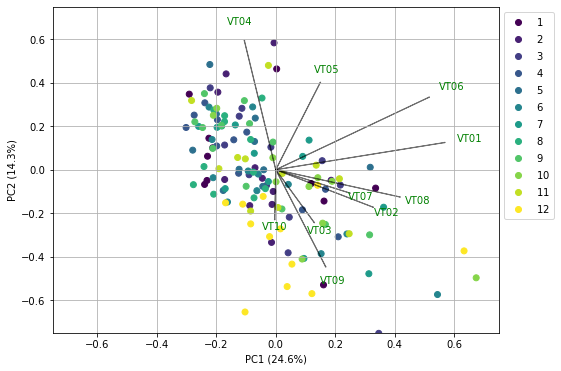

In [49]:
# include variation explained on each axis
# include only statistitically significant env vars?
# Scaling mean = 0, var = 1
plt.figure(figsize=(8, 6))
y = pca_df.index
scaler = StandardScaler()
scaler.fit(pca_df.values)
X=scaler.transform(pca_df.values)
pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 3.0/(xs.max() - xs.min())
    scaley = 3.0/(ys.max() - ys.min())
    scatter = plt.scatter(xs * scalex,ys * scaley, c = y)
    plt.legend(*scatter.legend_elements(), bbox_to_anchor=(1, 1))
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'black',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, rf_df_dict[labels[i]], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-0.75,0.75)
    plt.ylim(-0.75,0.75)
    plt.xlabel("PC{}".format(1) + ' (' + str(round(pca.explained_variance_ratio_[0]*100, 1)) + '%)')
    plt.ylabel("PC{}".format(2) + ' (' + str(round(pca.explained_variance_ratio_[1]*100, 1)) + '%)')
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]), columns)
plt.savefig('../Figures/pca_biplot_AMF.jpg', bbox_inches = 'tight', dpi = 300)